In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Lasso
import matplotlib

%matplotlib inline


In [51]:
housing = pd.read_csv("housing.csv")

In [52]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
housing.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [54]:
housing['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

(array([6.165e+03, 9.139e+03, 3.100e+03, 1.046e+03, 4.660e+02, 2.160e+02,
        1.040e+02, 7.300e+01, 4.800e+01, 2.200e+01, 1.700e+01, 6.000e+00,
        1.300e+01, 5.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([1.0000e+00, 3.2320e+02, 6.4540e+02, 9.6760e+02, 1.2898e+03,
        1.6120e+03, 1.9342e+03, 2.2564e+03, 2.5786e+03, 2.9008e+03,
        3.2230e+03, 3.5452e+03, 3.8674e+03, 4.1896e+03, 4.5118e+03,
        4.8340e+03, 5.1562e+03, 5.4784e+03, 5.8006e+03, 6.1228e+03,
        6.4450e+03]),
 <a list of 20 Patch objects>)

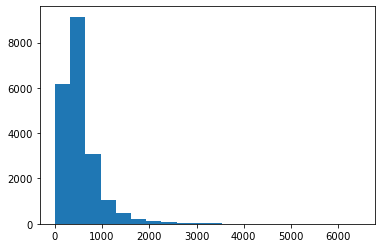

In [55]:

plt.hist(housing[housing['total_bedrooms'].notnull()]['total_bedrooms'],bins=20)

In [56]:
housing['total_bedrooms']=housing['total_bedrooms'].fillna(housing['total_bedrooms'].median())

In [57]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [58]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


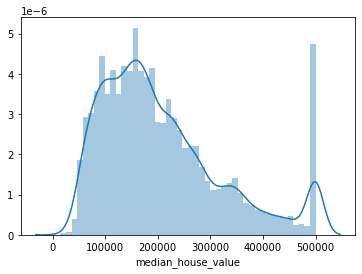

In [59]:
sns.distplot(housing['median_house_value'])

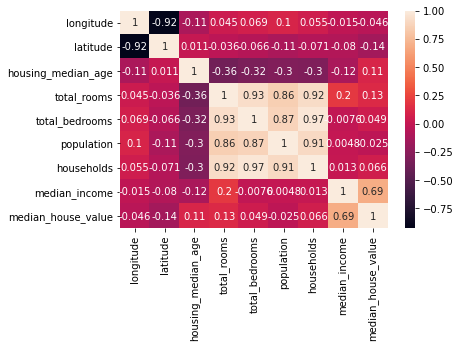

In [60]:
sns.heatmap(housing.corr(),annot=True)

In [61]:
#population , households and total_bedrooms are features with high correlation

In [62]:
# converting ocean_proximity to dummies
housing=pd.concat([pd.get_dummies(housing['ocean_proximity'],drop_first=True),housing],axis=1).drop('ocean_proximity',axis=1)

In [63]:
#split data
X = housing.drop("median_house_value",axis=1)
y = housing["median_house_value"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20)

In [64]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
Xtrain=ms.fit_transform(Xtrain)
Xtest=ms.transform(Xtest)

Train accuracy 0.6406772924906969
Test accuracy 0.6644011511903205


Text(0.5, 1.0, 'coeff graph')

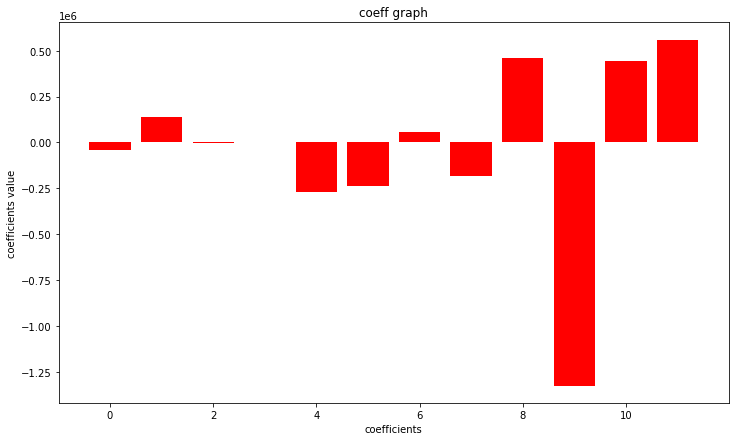

In [88]:
#Ridge
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(Xtrain, ytrain)
ridge_reg.predict(Xtest)
print("Train accuracy" ,ridge_reg.score(Xtrain,ytrain))
print("Test accuracy" ,ridge_reg.score(Xtest,ytest))
plt.figure(figsize=(12,7))
plt.bar(np.arange(len(ridge_reg.coef_)),ridge_reg.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

Train accuracy 0.6407144716793304
Test accuracy 0.6645978795586335


Text(0.5, 1.0, 'coeff graph')

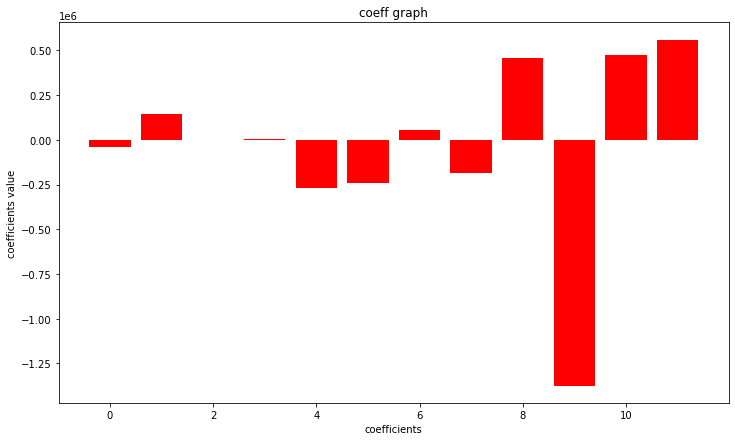

In [90]:
#Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(Xtrain, ytrain)
lasso_reg.predict(Xtest)
print("Train accuracy" ,lasso_reg.score(Xtrain,ytrain))
print("Test accuracy" ,lasso_reg.score(Xtest,ytest))
plt.figure(figsize=(12,7))
plt.bar(np.arange(len(lasso_reg.coef_)),lasso_reg.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

Train accuracy 0.38845856941153256
Test accuracy 0.39930703462870154


Text(0.5, 1.0, 'coeff graph')

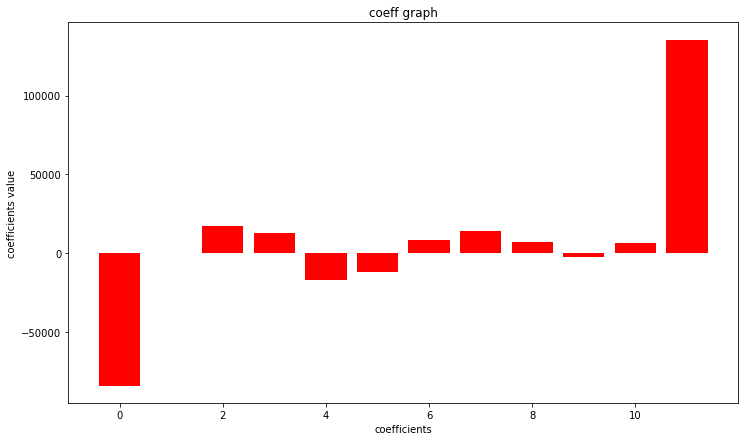

In [89]:
#ElasticNet
ela_reg = ElasticNet(alpha=0.1 , l1_ratio=0.5)
ela_reg.fit(Xtrain, ytrain)
ela_reg.predict(Xtest)
print("Train accuracy" ,ela_reg.score(Xtrain,ytrain))
print("Test accuracy" ,ela_reg.score(Xtest,ytest))
plt.figure(figsize=(12,7))
plt.bar(np.arange(len(ela_reg.coef_)),ela_reg.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

Train accuracy 0.6407144938628728
Test accuracy 0.6646007443887082


Text(0.5, 1.0, 'coeff graph')

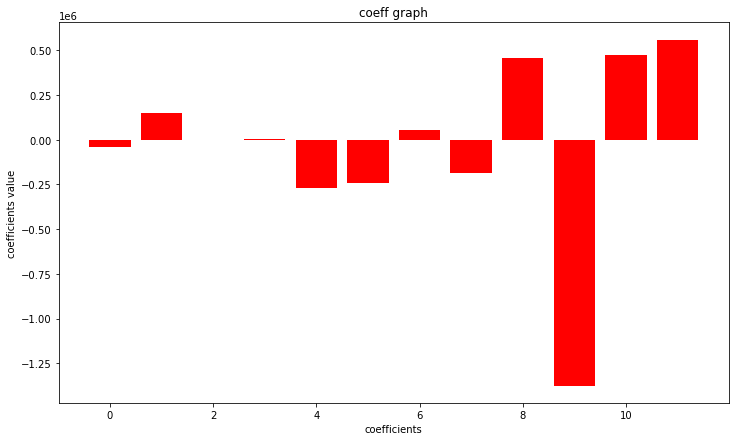

In [92]:
from sklearn.linear_model import LinearRegression
#LinearRegression
lg_reg = LinearRegression()
lg_reg.fit(Xtrain, ytrain)
lg_reg.predict(Xtest)
print("Train accuracy" ,lg_reg.score(Xtrain,ytrain))
print("Test accuracy" ,lg_reg.score(Xtest,ytest))
plt.figure(figsize=(12,7))
plt.bar(np.arange(len(lg_reg.coef_)),lg_reg.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

In [98]:
#XGBoost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier,XGBRegressor

pipe = Pipeline((
("pt",PowerTransformer()),
("py",PolynomialFeatures(2)),
("sc",StandardScaler()),
("xgb",XGBRegressor()),
))

pipe.fit(Xtrain,ytrain)
print("Train accuracy" ,pipe.score(Xtrain,ytrain))
print("Test accuracy" ,pipe.score(Xtest,ytest))

XGB_Trainscore = pipe.score(Xtrain,ytrain)
XGB_Testscore = pipe.score(Xtest,ytest)

ModuleNotFoundError: No module named 'xgboost'